## Comparison of all model types and datasets

**Models:**
* Neural Network (10, 10, 1)

**Datasets:**
* parabola ($x^2$)
* noisy parabola ($x^2$)
* polynomial ($x^3$)

### Load datasets

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from datasets.polynomials import get_polynomial, get_noisy_polynomial
from NeuralNetworks.simple_nn import SimpleNN
from helper_functions import *
from plotting import *
from sklearn.preprocessing import MinMaxScaler

x_parabola, y_parabola = get_polynomial(2.0)
x_noisy_parabola, y_noisy_parabola = get_noisy_polynomial(2.0)
x_poly, y_poly = get_polynomial(3.0)

# Scaling the data such that it lies between 0 and 1
scale_x_parabola = MinMaxScaler()
x_parabola = scale_x_parabola.fit_transform(x_parabola)
scale_y_parabola = MinMaxScaler()
y_parabola = scale_y_parabola.fit_transform(y_parabola)

scale_x_poly = MinMaxScaler()
x_poly = scale_x_poly.fit_transform(x_poly)
scale_y_poly = MinMaxScaler()
y_poly = scale_y_poly.fit_transform(y_poly)

scale_x_noisy_parabola = MinMaxScaler()
x__noisyparabola = scale_x_noisy_parabola.fit_transform(x_noisy_parabola)
scale_y_noisy_parabola = MinMaxScaler()
y_noisy_parabola = scale_y_noisy_parabola.fit_transform(y_noisy_parabola)

### Train models

In [2]:
simple_nn_predictions_parabola = SimpleNN(hidden_layer_sizes=(20,20)).fit_predict(x_parabola, y_parabola, epochs=2000)
simple_nn_predictions_noisy_parabola = SimpleNN(hidden_layer_sizes=(20,20,20)).fit_predict(x_noisy_parabola, y_noisy_parabola, epochs=2000)
simple_nn_predictions_poly = SimpleNN(hidden_layer_sizes=(20,20,20)).fit_predict(x_poly, y_poly, epochs=2000)

4/4 [==============================] - 0s 856us/step


### Plot results

In [3]:
# Reverse the minmax transform to get the original values
x_plot_parabola = scale_x_parabola.inverse_transform(x_parabola)
y_plot_parabola = scale_y_parabola.inverse_transform(y_parabola)
simple_nn_predictions_parabola_plot = scale_y_parabola.inverse_transform(simple_nn_predictions_parabola)

x_plot_noisy_parabola = scale_x_noisy_parabola.inverse_transform(x_noisy_parabola)
y_plot_noisy_parabola = scale_y_noisy_parabola.inverse_transform(y_noisy_parabola)
simple_nn_predictions_noisy_parabola_plot = scale_y_noisy_parabola.inverse_transform(simple_nn_predictions_noisy_parabola)

x_plot_poly = scale_x_poly.inverse_transform(x_poly)
y_plot_poly = scale_y_poly.inverse_transform(y_poly)
simple_nn_predictions_poly_plot = scale_y_poly.inverse_transform(simple_nn_predictions_poly)


MSE: 513.97


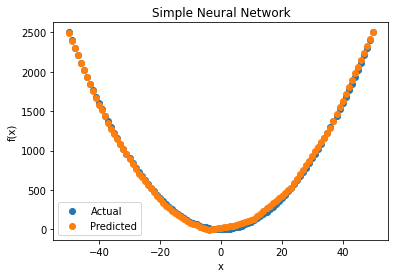

In [4]:
plot_model(x_plot_parabola, y_plot_parabola, simple_nn_predictions_parabola_plot, 'Simple Neural Network')

MSE: 1019833.28


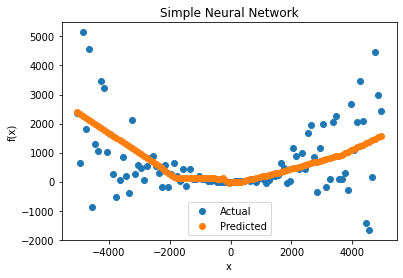

In [5]:
plot_model(x_plot_noisy_parabola, y_plot_noisy_parabola, simple_nn_predictions_noisy_parabola_plot, 'Simple Neural Network')

MSE: 2315033.30


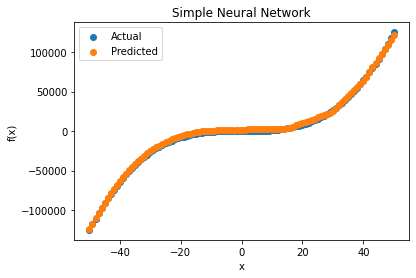

In [6]:
plot_model(x_plot_poly, y_plot_poly, simple_nn_predictions_poly_plot, 'Simple Neural Network')